Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Exercício Avalitivo de Filtragem Espacial

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from numpy.core.memmap import uint8
import math

In [ ]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)
#cv2_imshow(img)

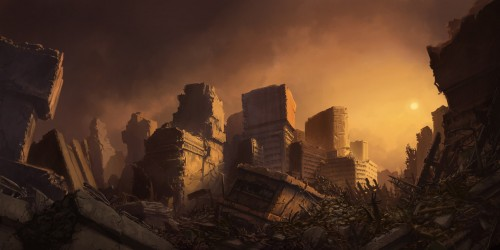

In [ ]:
#mostrando a imagem colorida
cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

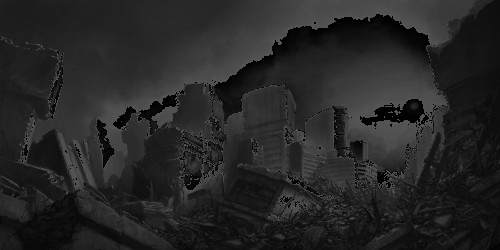

In [ ]:
#aplicando conversão básica
#numpy
#img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B+G+R)/3

#img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2_imshow(img_grayscale_basic)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

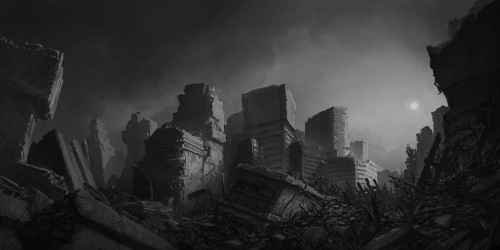

In [ ]:
#aplicando conversão ponderada
#img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

#img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2_imshow(img_grayscale_pondered)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Filtro Espacial


In [ ]:
def gauss_create(sigma, size_x, size_y):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))
    
    return exp*calc

    

In [ ]:
def showImage(img, width, height):
    plt.rcParams['figure.figsize'] = [width, height] 
    plt.imshow(img, cmap='gray')
    plt.show()

### Suavização

1. Implemente a sua própria convolução manualmente, em formato de função, utilizando os conceitos vistos em aula
2. Aplique a filtragem de suavização, com as máscaras 3x3, 5x5 e 7x7, com os filtros:
 - média
 - gaussino (escolha uma distribuição adequada, podendo utilizar a função acima ou recuperando a distribuição usada na OpenCV)
 - mediana 
4. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255.

**Convolução**

In [ ]:
def convolucao(img, valor):
  kernel = np.zeros((valor, valor))
  for x in range(valor):
    for y in range(valor):
      kernel[x,y] = 1/(kernel.shape[0] ** 2)

  if valor == 3:
    padding = 1
  elif valor == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = (aux * kernel).sum()
      if aux2 > 255:
        aux2 = 255
      saida[i-1,j-1] = aux2

  return saida

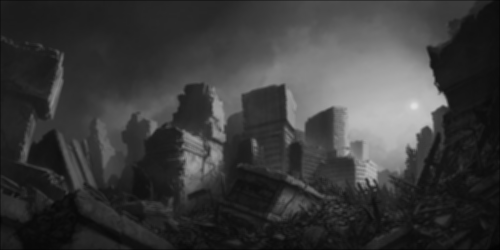

In [ ]:
img = cv2.imread('data/t1.jpg',0)
saida_convolucao = convolucao(img, 3)

cv2_imshow(saida_convolucao)

**Média**

In [ ]:
def media(img, valor):
  if valor == 3:
    padding = 1
  elif valor == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = (aux.sum())/(valor ** 2)
      if aux2 > 255:
        aux2 = 255
      elif aux2 < 0:
        aux2 = 0
      saida[i-1,j-1] = aux2
      
  return saida

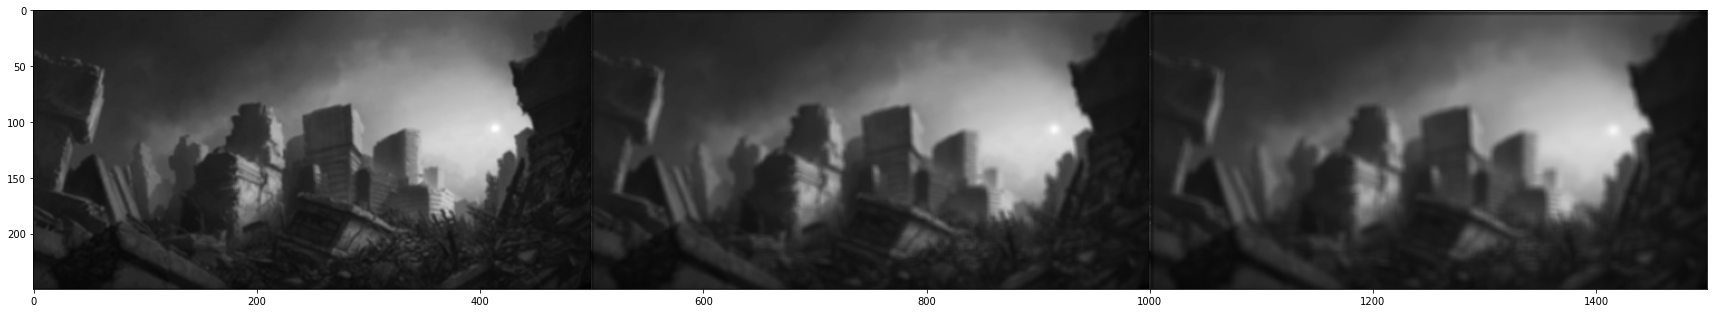

In [ ]:
saida_media1 = media(img, 3)
#print("Média 3x3")
#cv2_imshow(saida_media1)

saida_media2 = media(img, 5)
#print("Média 5x5")
#cv2_imshow(saida_media2)

saida_media3 = media(img, 7)
#print("Média 7x7")
#cv2_imshow(saida_media3)

showImage(cv2.hconcat([saida_media1,saida_media2, saida_media3]), 30, 80)

**Gaussiano**

In [ ]:
def gaussiana(img, valor, sigma):
  kernel = gauss_create(sigma, valor, valor)

  if valor == 3:
    padding = 1
  elif valor == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = (aux * kernel).sum()
      if aux2 > 255:
        aux2 = 255
      elif aux2 < 0:
        aux2 = 0
      saida[i-1,j-1] = int(aux2)
      
  return saida

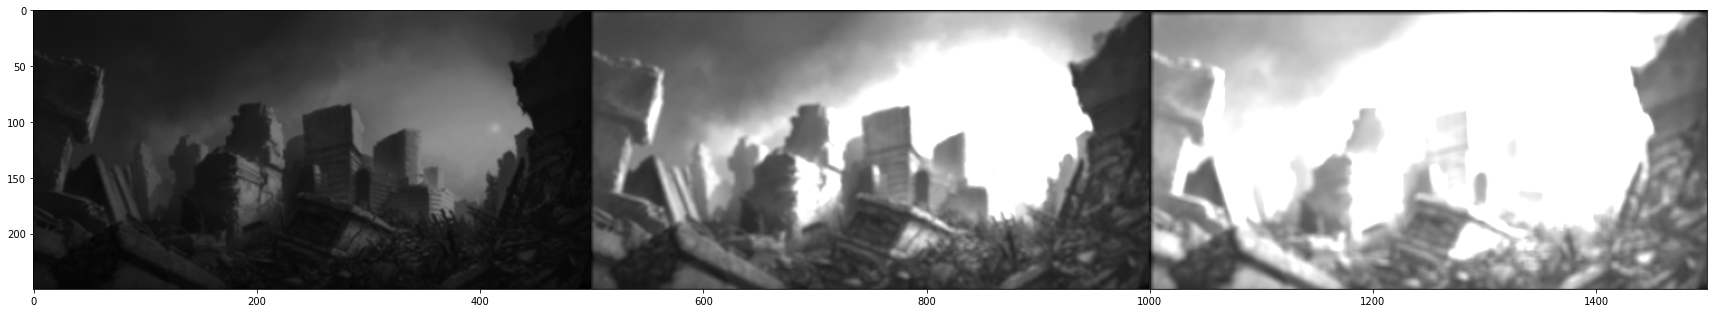

In [ ]:
saida_gaussiana1 = gaussiana(img, 3, 1)
#print("Gaussiana 3x3")
#cv2_imshow(saida_gaussiana1)

saida_gaussiana2 = gaussiana(img, 5, 1)
#print("Gaussiana 5x5")
#cv2_imshow(saida_gaussiana2)

saida_gaussiana3 = gaussiana(img, 7, 1)
#print("Gaussiana 7x7")
#cv2_imshow(saida_gaussiana3)

showImage(cv2.hconcat([saida_gaussiana1,saida_gaussiana2, saida_gaussiana3]), 30, 80)

**Mediana**

In [ ]:
def mediana(img, valor):
  if valor == 3:
    padding = 1
  elif valor == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = np.median(aux)
      if aux2 > 255:
        aux2 = 255
      elif aux2 < 0:
        aux2 = 0
      saida[i-1,j-1] = aux2
      
  return saida

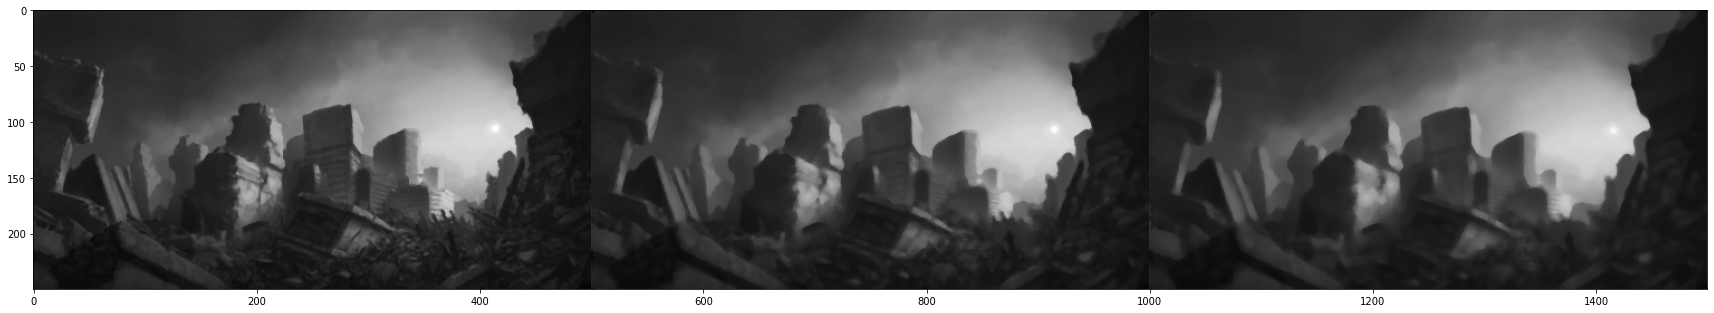

In [ ]:
saida_mediana1 = mediana(img, 3)
#print("Mediana 3x3")
#cv2_imshow(saida_mediana1)

saida_mediana2 = mediana(img, 5)
#print("Mediana 5x5")
#cv2_imshow(saida_mediana2)

saida_mediana3 = mediana(img, 7)
#print("Mediana 7x7")
#cv2_imshow(saida_mediana3)

showImage(cv2.hconcat([saida_mediana1,saida_mediana2, saida_mediana3]), 30, 80)

### Sharpening

4. Implemente os filtros de sharpening, utilizando as diferentes mascarás apresentadas no livro de referência da disciplina:
 - Laplaciano (figura 3.37)
 - Sharpening implementado na figura 3.38
 - Unsharp Masking e Highboost Filtering
 - Implemente os detectores de borda Laplaciano, Roberts e Sobel
 - Utilize a função Canny da OpenCV na mesma imagem usando nos outros detectores
 
5. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos
6. Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?
7. Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.

**Laplaciano 3.37**

In [ ]:
def laplaciano(img, kernel):
  if kernel.shape[0] == 3:
    padding = 1
  elif kernel.shape[0]  == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = (aux * kernel).sum()
      if aux2 > 255:
        aux2 = 255
      elif aux2 < 0:
        aux2 = 0
      saida[i-1,j-1] = aux2

  return saida

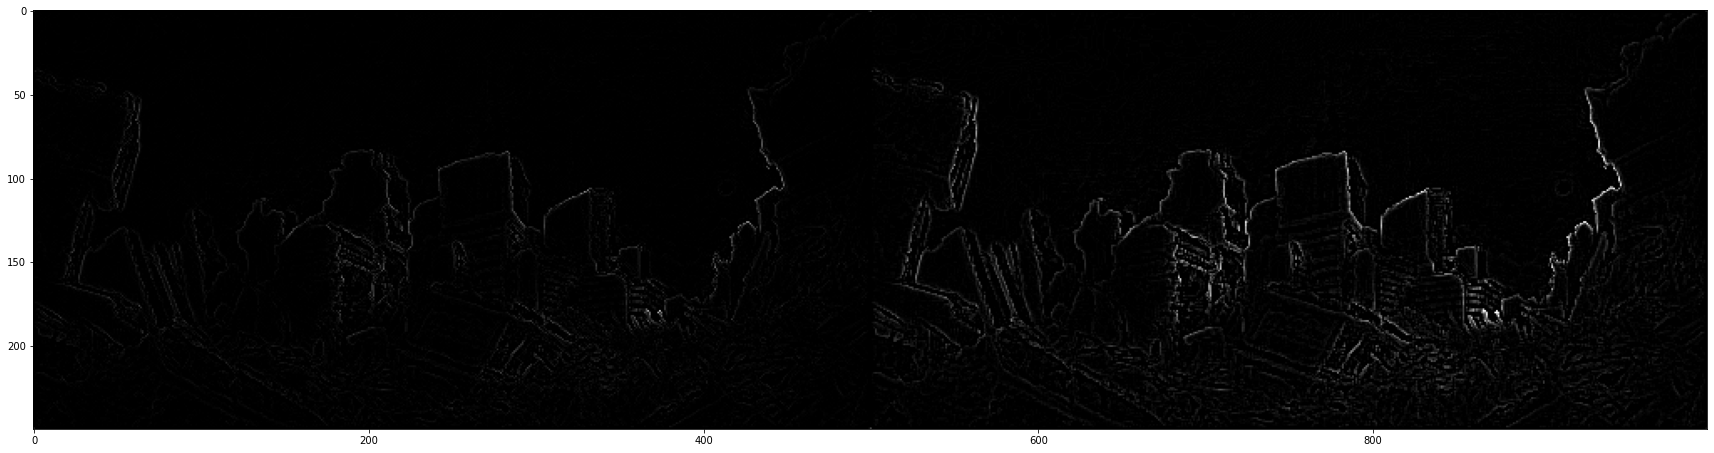

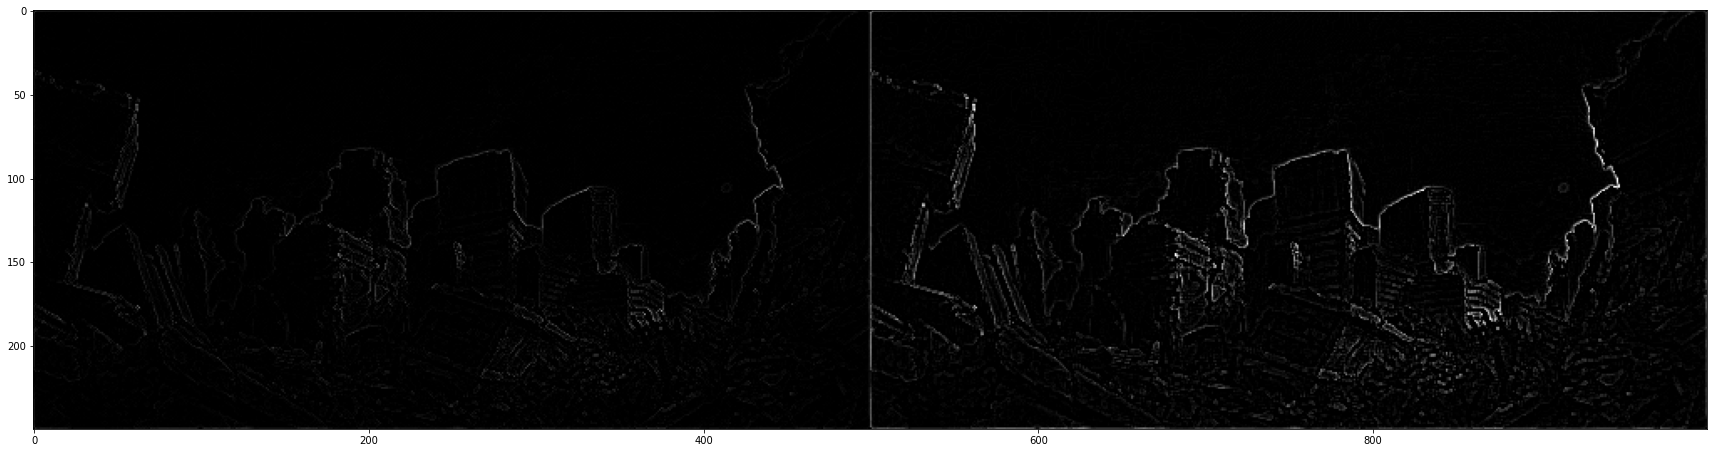

In [ ]:
kernel_1 = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]))
saida_1 = laplaciano(saida_mediana1, kernel_1)
#cv2_imshow(saida_1)

kernel_2 = np.array(([1, 1, 1],[1, -8, 1],[1, 1, 1]))
saida_2 = laplaciano(saida_mediana1, kernel_2)
#cv2_imshow(saida_2)

showImage(cv2.hconcat([saida_1,saida_2]), 30, 80)

kernel_3 = np.array(([0, -1, 0],[-1, 4, -1],[0, -1, 0]))
saida_3 = laplaciano(saida_mediana1, kernel_3)
#cv2_imshow(saida_3)

kernel_4 = np.array(([-1, -1, -1],[-1, 8, -1],[-1, -1, -1]))
saida_4 = laplaciano(saida_mediana1, kernel_4)
#cv2_imshow(saida_4)

showImage(cv2.hconcat([saida_3,saida_4]), 30, 80)

**Laplaciano** **3.38**

In [ ]:
def laplace(img, kernel):
  if kernel.shape[0] == 3:
    padding = 1
  elif kernel.shape[0]  == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = imagepadding.shape[0], imagepadding.shape[1]
  saida = img.copy()

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      aux2 = (aux * kernel).sum()
      saida[i-1,j-1] = aux2
  return saida
  
def ajuste(img):
  lmin = float(img.min())
  lmax = float(img.max())

  return np.floor((img-lmin)/(lmax-lmin)*255.0)

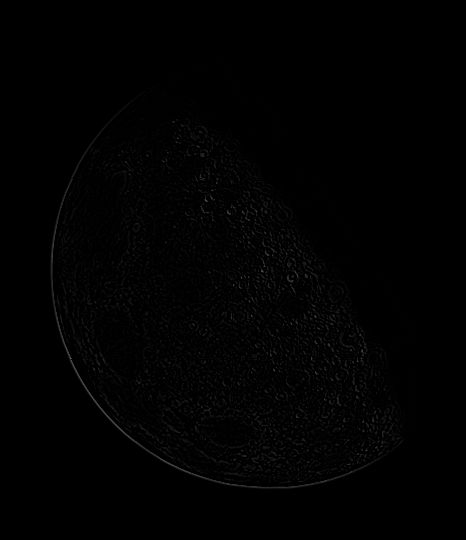

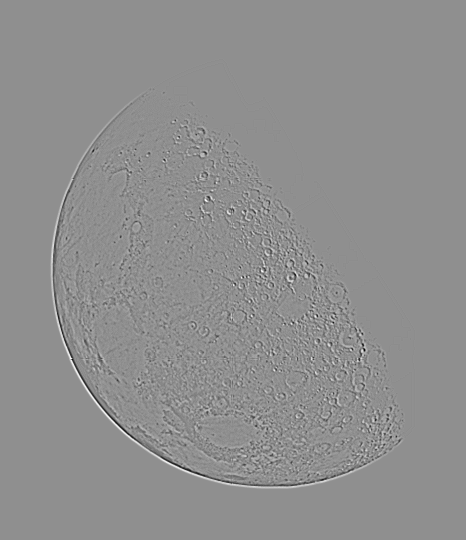

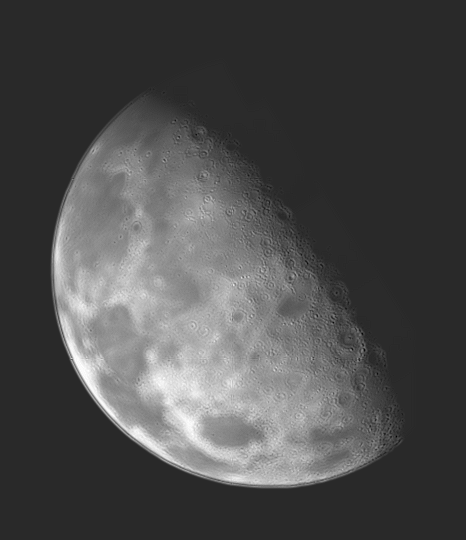

In [ ]:
lua = cv2.imread('data/lua.tif',0)
saida_5 = ajuste(lua)

saida_6 = laplace(saida_5, kernel_1)
cv2_imshow(saida_6)

#showImage(cv2.hconcat([saida_5,saida_6]), 30, 80)

saida_7 = ajuste(saida_6)
cv2_imshow(saida_7)

c = 1
saida_8 = saida_5 + (c * saida_7)
saida_8 = ajuste(saida_8)
cv2_imshow(saida_8)

#showImage(cv2.hconcat([saida_7,saida_8]), 30, 80)

**Unsharp** **Masking** **e** **Highboost** **Filtering**

In [ ]:
def subtrair(img_original, img_borrada):
  mascara = np.zeros((img_original.shape[0], img_original.shape[1]))

  for i in range(img_original.shape[0]):
    for j in range(img_original.shape[1]):
      aux = img_original[i, j] - int(img_borrada[i, j])
      if aux > 255:
        aux = 255
      elif aux < 0:
        aux = 0
      mascara[i, j] = aux

  return mascara

def adicionar(img_original, mascara, k):
  nova_imagem = np.zeros((img_original.shape[0], img_original.shape[1]))

  for i in range(img_original.shape[0]):
    for j in range(img_original.shape[1]):
      aux2 = img_original[i, j] + (k * mascara[i, j])
      if aux2 > 255:
        aux2 = 255
      elif aux2 < 0:
        aux2 = 0
      nova_imagem[i, j] = aux2

  return nova_imagem

Suavização Gaussiana


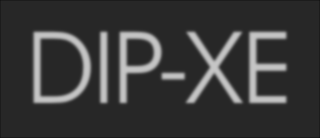

Mascara


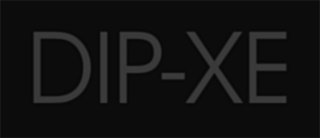

Unsharp Masking


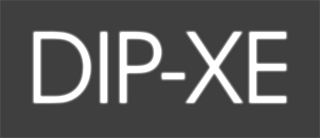

Highboost Filtering


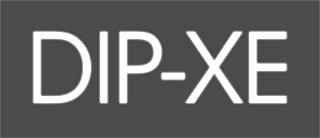

In [ ]:
placa = cv2.imread('data/placa.tif',0)
placa_suave = gaussiana(placa, 3, 1)
print("Suavização Gaussiana")
cv2_imshow(placa_suave)

mascara_1 = subtrair(placa, placa_suave)
print("Mascara")
cv2_imshow(mascara_1)

saida_unsharp = adicionar(placa, mascara_1, 1)
print("Unsharp Masking")
cv2_imshow(saida_unsharp)

saida_highboost = adicionar(placa, mascara_1, 2)
print("Highboost Filtering")
cv2_imshow(saida_highboost)

**Sobel**

In [ ]:
def calc_sobel(img, kernel_sobel_1, kernel_sobel_2):                
  kernel_shape = kernel_sobel_1.shape[0]
  if kernel_shape == 3:
    padding = 1
  elif kernel_shape == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = img.shape[0], img.shape[1]
  nova_img = np.zeros((iH,iW))

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      temp1 = int(np.sum(aux * kernel_sobel_1))
      temp2 = int(np.sum(aux * kernel_sobel_2))
      soma = abs(temp1) + abs(temp2) 
      if soma > 255:
        nova_img[i-1, j-1] = 255
      elif soma < 0:
        nova_img[i-1, j-1] = 0
      else:
        nova_img[i-1, j-1] = math.ceil(soma)

  return nova_img

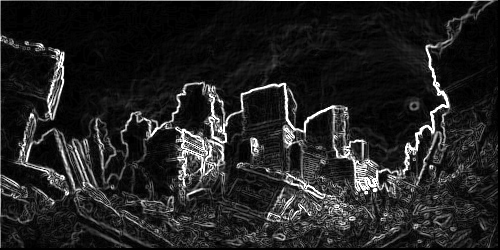

In [ ]:
kernel_sobel_1 = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_2 = np.array([ [-1,-2,-1], [0, 0, 0], [1, 2, 1]])

saida_sobel = calc_sobel(img, kernel_sobel_1, kernel_sobel_2)
cv2_imshow(saida_sobel)

**Roberts**

In [ ]:
def calc_robert(img, kernel_robert_1, kernel_robert_2):                
  kernel_shape = kernel_sobel_1.shape[0]
  if kernel_shape == 3:
    padding = 1
  elif kernel_shape == 5:
    padding = 2
  else:
    padding = 3

  imagepadding = cv2.copyMakeBorder(img, padding, padding, padding, padding,	cv2.BORDER_CONSTANT, None, value = 0)
  iH, iW = img.shape[0], img.shape[1]
  nova_img = np.zeros((iH,iW))

  for i in range(0+padding, iH-(padding*2)+1):
    for j in range(0+padding, iW-(padding*2)+1):
      aux = imagepadding[i - padding:i + padding + 1, j - padding:j + padding + 1]
      temp1 = int(np.sum(aux * kernel_robert_1))
      temp2 = int(np.sum(aux * kernel_robert_1))
      soma = abs(temp1) + abs(temp2) 
      if soma > 255:
        nova_img[i-1, j-1] = 255
      elif soma < 0:
        nova_img[i-1, j-1] = 0
      else:
        nova_img[i-1, j-1] = math.ceil(soma)

  return nova_img

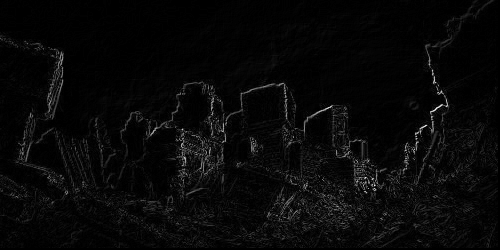

In [ ]:
kernel_robert_1 = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]])
kernel_robert_2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

saida_robert = calc_robert(img, kernel_robert_1, kernel_robert_2)
cv2_imshow(saida_robert)

**Canny**

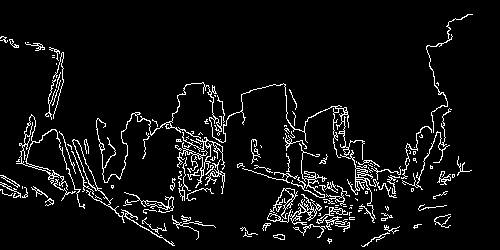

In [ ]:
canny_img = cv2.Canny(img, 50, 150)
cv2_imshow(canny_img)

**Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos:**

As imagens tratadas com os kernels laplacianos são as que apresentaram uma detecção de borda inferior, mas detectam menos ruidos em relação a sobel e roberts. O Sobel realça bastante as bordas da imagem, mas acaba detectando bastante ruido, já o Roberts realça menos as bordas e deteca menos ruidos também. Unsharp Masking e Highboost Filtering suavizam bastante a imagem depois de passar pelas máscaras geradas, sendo mais limpas que a suavização gaussiana usada para gerar a máscara.

**Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?**

Tem uma boa diferença entre os 3 filtros e o Canny, pois ele captura exatamente as bordas da imagem, sem detectar os ruidos presentes na imagem.

**Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.**

A imagem fica com as bordas bem mais realçadas, ficando bem parecida com as detectadas pelo Canny, mas ainda passa bastante ruido.

Sobel com imagem suavizada:


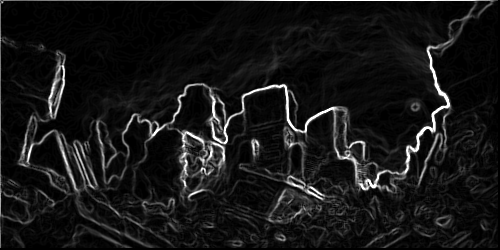

In [ ]:
nova_sobel = calc_sobel(saida_mediana2, kernel_sobel_1, kernel_sobel_2)
print("Sobel com imagem suavizada:")
cv2_imshow(nova_sobel)